---
title: "Correlation and Experimental Design"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-06"
categories: [python, datacamp, statistics, correlation]
image: "chapter4.jpg"

---

# Correlation and Experimental Design
We will explore how to quantify the strength of a linear relationship between two variables, and explore how confounding variables can affect the relationship between two other variables. we'll also see how a study’s design can influence its results, change how the data should be analyzed, and potentially affect the reliability of your conclusions

This **Correlation and Experimental Design** is part of [Datacamp course: Introduction to Statistic in Python](https://app.datacamp.com/learn/courses/introduction-to-statistics-in-python)

This is my learning experience of data science through DataCamp

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

## Correlation

    * Correlation coefficient
        * Quantifies the linear relationship between two variables
        * Number between -1 and 1
        * Magnitude corresponds to strength of relationship
        * Sign (+ or -) corresponds to direction of relationship

    * Pearson product-moment correlation(rr)

<img src="calculate correlation.png"/>

### Relationships between variables

Here we'll be working with a dataset world_happiness containing results from the 2019 World Happiness Report. The report scores various countries based on how happy people in that country are. It also ranks each country on various societal aspects such as social support, freedom, corruption, and others. The dataset also includes the GDP per capita and life expectancy for each country.

In this exercise, you'll examine the relationship between a country's life expectancy (life_exp) and happiness score (happiness_score) both visually and quantitatively.

In [20]:
world_happiness = pd.read_csv('world_happiness.csv', index_col=0)
world_happiness.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


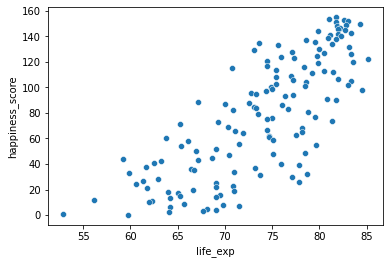

In [21]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score',data=world_happiness)

# Show plot
plt.show()

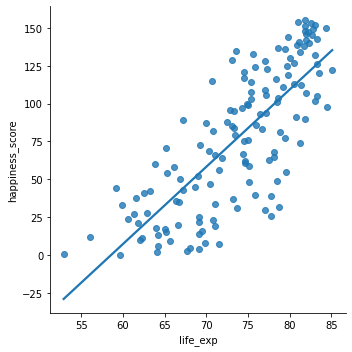

In [22]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score',data=world_happiness, ci=None)

# Show plot
plt.show()

In [23]:
# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

0.7802249053272062


### Correlation caveats

    * Correlation only accounts for linear relationships
    * Transformation
       *  Certain statistical methods rely on variables having a linear relationship
            * Correlation coefficient
            * Linear regression
    * Correlation does not imply causation
        * x is correlated with yy does not mean xx causes y

### What can't correlation measure?

While the correlation coefficient is a convenient way to quantify the strength of a relationship between two variables, it's far from perfect. Here we'll explore one of the caveats of the correlation coefficient by examining the relationship between a country's GDP per capita (gdp_per_cap) and happiness score.

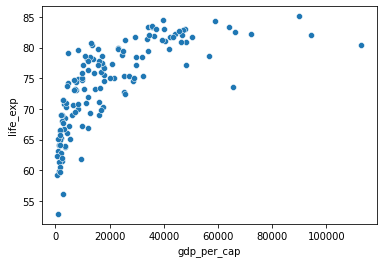

In [24]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap',y='life_exp', data=world_happiness)

# Show plot
plt.show()

In [25]:
# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor)

0.7019547642148015


### Transforming variables

When variables have skewed distributions, they often require a transformation in order to form a linear relationship with another variable so that correlation can be computed. Here we'll perform a transformation yourself

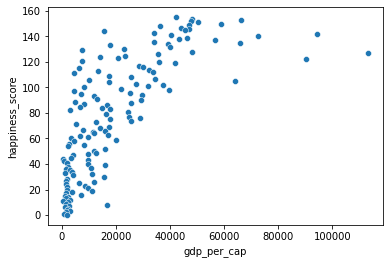

0.7279733012222975


In [26]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

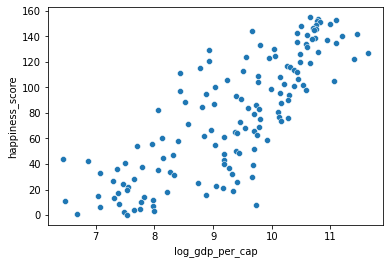

0.8043146004918288

 The relationship between GDP per capita and happiness became more linear by applying a log transformation. Log transformations are great to use on variables with a skewed distribution, such as GDP


In [27]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of log_gdp_per_cap and happiness_score
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness);
plt.show()

# Calculate correlation
cor =  world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

print("\n The relationship between GDP per capita and happiness became more linear by applying a log transformation. Log transformations are great to use on variables with a skewed distribution, such as GDP")

### Does sugar improve happiness?

A new column has been added to world_happiness called grams_sugar_per_day, which contains the average amount of sugar eaten per person per day in each country. We'll examine the effect of a country's average sugar consumption on its happiness score.

In [28]:
world_happiness = pd.read_csv('world_happiness_add_sugar.csv', index_col=0)
world_happiness

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score,grams_sugar_per_day
Unnamed: 0,,,,,,,,,
1,Finland,2,5,4.0,47,42400,81.8,155,86.8
2,Denmark,4,6,3.0,22,48300,81.0,154,152.0
3,Norway,3,3,8.0,11,66300,82.6,153,120.0
4,Iceland,1,7,45.0,3,47900,83.0,152,132.0
5,Netherlands,15,19,12.0,7,50500,81.8,151,122.0
...,...,...,...,...,...,...,...,...,...
129,Yemen,100,147,83.0,155,2340,68.1,5,77.9
130,Rwanda,144,21,2.0,90,2110,69.1,4,14.1
131,Tanzania,131,78,34.0,49,2980,67.7,3,28.0


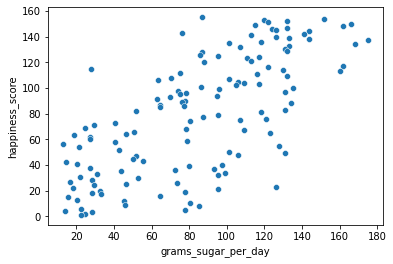

0.6939100021829634


In [29]:
# Scatterplot of grams_sugar_per_day and happiness_score
sns.scatterplot(x='grams_sugar_per_day', y='happiness_score', data=world_happiness)
plt.show()

# Correlation between grams_sugar_per_day and happiness_score
cor =  world_happiness['grams_sugar_per_day'].corr(world_happiness['happiness_score'])
print(cor)

## Design of experiments

    * Vocabulary
        * Experiment aims to answer: What is the effect of the treatment on the response?
            * Treatment: explanatory / independent variable
            * Response: response / dependent variable
        * E.g.: What is the effect of an advertisement on the number of products purchased?
            * Treatment: advertisement
            * Response: number of products purchased
                * Controlled experiments
                * Participants are assigned by researchers to either treatment group or control group
                * Treatment group sees advertisement
                * Control group does not
                * Group should be comparable so that causation can be inferred
                * If groups are not comparable, this could lead to confounding (bias)
    * Gold standard of experiment
        * Randomized controlled trial
            * Participants are assigned to treatment/control randomly, not based on any other characteristics
            C* hoosing randomly helps ensure that groups are comparable
        * Placebo
            * Resembles treatement, but has no effect
            * Participants will not know which group they're in
        * Double-blind trial
            * Person administering the treatment/running the study doesn't know whether the treatment is real or a placebo
            * Prevents bias in the response and/or analysis of results
        * Fewopportunities for bias = more reliable conclusion about causation
    * Observational studies
        * Participants are not assigned randomly to groups
            * Participants assign themselves, usually based on pre-existing characteristics
        * Many research questions are not conductive to a controlled experiment
            * Cannot force someone to smoke or have a disease
        * Establish association, not causation
            * Effects can be confounded by factors that got certain people into the control or treatment group
            * There are ways to control for confounders to get more reliable conclusions about association
                * Longitudinal vs. cross-sectional studies
        * Longitudinal study
            * Participants are followed over a period of time to examine effect of treatment on response
            * Effect of age on height is not confounded by generation
            * More expensive, results take longer
        * Cross-sectional study
            * Data on participants is collected from a single snapshot in time
            * Effect of age on height is confounded by generation
            * Cheaper, fater, more convenient